<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Larminie-Dicks Static Model

### Version 1.4

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#VCell">VCell</a></li>
    <ul>
        <li><a href="#VStack">VStack</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
Larminie-Dicks model is obtained for large variation of the load parameters. In this model, the fuel cell is represented by means of its voltage–current characteristic obtained in static operating mode. In fact, Larminie-Dicks static model presents the fuel cell voltage as a function of the current magnitude. The obtained polarization curve is composed of three main regions corresponding to the predominance of electrochemical activation phenomena (region I), a linear part (region II) where the voltage drop is mainly due to electronic and ionic internal resistances and the last region where the diffusion kinetics of gases through the electrodes becomes the limiting factor (region III). This last zone is characterized by a rapid voltage fall.
It has to be noted that this curve is common to all fuel cells and consequently no units are depicted on it.
</p>

<div style="text-align:center;">
   
<img src="images/Static-Model-Graphic.jpg" onerror='this.src="../images/Static-Model-Graphic.jpg"'>  
<p style="text-align:center;">Fig1. Graphical Abstract of Static Models</p>
</div>

## VCell

$$V_{cell}=E_0-A\times ln(\frac{i+i_n}{i_0})-R_m\times (i+i_n)+B\times ln(1-\frac{i+i_n}{i_L})$$


$$B=\frac{RT}{nF}$$

In [1]:
from opem.Static.Larminie_Dicks import Vcell_Calc
Vcell=Vcell_Calc(E0=1.178, i=1,i_0=0.00654,i_n=0.23 ,i_L=100.0 ,R_M=0.0018,A=0.06,B=0.01)
Vcell

0.8614523003154779

* Notice : from opem.Larminie_Dicks in version (0.3>)

### VStack

$$V_{Stack}=N\times V_{cell}$$

In [2]:
from opem.Static.Larminie_Dicks import VStack_Calc
VStack=VStack_Calc(Vcell=Vcell,N=23)
VStack

19.81340290725599

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Stack}=N\times P$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [3]:
from opem.Static.Larminie_Dicks import Power_Calc,PowerStack_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=Vcell,i=2)
Power

1.7229046006309559

In [4]:
PowerStack_Calc(Power=Power,N=23)

39.62680581451198

In [5]:
Power_Thermal_Calc(VStack=VStack,N=23,i=2)

16.953194185488016

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{cell}}{HHV}$$

In [6]:
from opem.Static.Larminie_Dicks import Efficiency_Calc
Efficiency_Calc(Vcell=Vcell)

0.5522130130227422

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0.1 to `i`=98 with `step`=0.1

In [7]:
Test_Vector = {
    "A": 0.06,
    "T": 328.15,
    "E0": 1.178,
    "RM": 0.0018,
    "i_0": 0.00654,
    "i_L": 100.0,
    "i_n": 0.23,
    "N": 23,
    "i-start": 0.1,
    "i-stop": 98,
    "i-step": 0.1,
    "Name": "Larminiee_Test"}


* Notice : "Name", new in version 0.5

In [8]:
from opem.Static.Larminie_Dicks import Static_Analysis
data=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Larminie-Dicks-Model Simulation
###########
Analyzing . . .
I : 0.1
PEM Efficiency : 0.6039038043415609 
Power : 0.09420899347728351 W
Power-Stack : 2.1668068499775206 W
Power-Thermal : 0.6621931500224794 W
VStack : 21.668068499775206 V
Vcell : 0.9420899347728351 V
###########
I : 0.2
PEM Efficiency : 0.5935988388304153 
Power : 0.1852028377150896 W
Power-Stack : 4.259665267447061 W
Power-Thermal : 1.3983347325529394 W
VStack : 21.298326337235302 V
Vcell : 0.9260141885754479 V
###########
I : 0.3
PEM Efficiency : 0.5854323548069047 
Power : 0.2739823420496314 W
Power-Stack : 6.301593867141523 W
Power-Thermal : 2.185406132858478 W
VStack : 21.00531289047174 V
Vcell : 0.9132744734987713 V
###########
I : 0.4
PEM Efficiency : 0.5786600533545858 
Power : 0.3610838732932615 W
Power-Stack : 8.304929085745016 W
Power-Thermal : 3.011070914254985 W
VStack : 20.762322714362536 V
Vcell : 0.9027096832331538 V
###########
I : 0.5
PEM Efficiency : 0.5728692080343738 
Power : 0.4468379822

Power : 11.994609316725224 W
Power-Stack : 275.87601428468014 W
Power-Thermal : 233.3439857153198 W
VStack : 15.326445238037788 V
Vcell : 0.6663671842625125 V
###########
I : 18.1
PEM Efficiency : 0.4268215731391588 
Power : 12.05173393915729 W
Power-Stack : 277.18988060061764 W
Power-Thermal : 234.8591193993824 W
VStack : 15.314358044233018 V
Vcell : 0.6658416540970877 V
###########
I : 18.2
PEM Efficiency : 0.42648582598304624 
Power : 12.108785571310648 W
Power-Stack : 278.5020681401449 W
Power-Thermal : 236.37593185985506 W
VStack : 15.3023114362717 V
Vcell : 0.6653178885335521 V
###########
I : 18.3
PEM Efficiency : 0.426151197559563 
Power : 12.165764387930407 W
Power-Stack : 279.8125809223994 W
Power-Thermal : 237.89441907760067 W
VStack : 15.290304968437122 V
Vcell : 0.6647958681929184 V
###########
I : 18.4
PEM Efficiency : 0.4258176756461997 
Power : 12.222670561748517 W
Power-Stack : 281.1214229202159 W
Power-Thermal : 239.4145770797841 W
VStack : 15.278338202185646 V
Vcell 


Power : 18.610834538313973 W
Power-Stack : 428.0491943812214 W
Power-Thermal : 434.7958056187786 W
VStack : 14.03439981577775 V
Vcell : 0.610191296338163 V
###########
I : 30.6
PEM Efficiency : 0.3908948321783985 
Power : 18.659755708868033 W
Power-Stack : 429.17438130396476 W
Power-Thermal : 436.49961869603527 W
VStack : 14.025306578560938 V
Vcell : 0.6097959381983017 V
###########
I : 30.7
PEM Efficiency : 0.3906417831820827 
Power : 18.708616280156303 W
Power-Stack : 430.298174443595 W
Power-Thermal : 438.20482555640496 W
VStack : 14.016227180573127 V
Vcell : 0.609401181764049 V
###########
I : 30.8
PEM Efficiency : 0.39038911722724595 
Power : 18.757416304534715 W
Power-Stack : 431.4205750042984 W
Power-Thermal : 439.91142499570157 W
VStack : 14.007161526113585 V
Vcell : 0.6090070228745037 V
###########
I : 30.9
PEM Efficiency : 0.3901368316716211 
Power : 18.806155833898824 W
Power-Stack : 432.54158417967295 W
Power-Thermal : 441.61941582032694 W
VStack : 13.998109520377767 V
Vce

PEM Efficiency : 0.3617947814411964 
Power : 24.26919393907546 W
Power-Stack : 558.1914605987356 W
Power-Thermal : 658.2785394012644 W
VStack : 12.98119675811013 V
Vcell : 0.5643998590482665 V
###########
I : 43.1
PEM Efficiency : 0.361574550696044 
Power : 24.310826490599215 W
Power-Stack : 559.149009283782 W
Power-Thermal : 660.1499907162181 W
VStack : 12.973294878974059 V
Vcell : 0.5640562990858287 V
###########
I : 43.2
PEM Efficiency : 0.3613544965856583 
Power : 24.352402233900687 W
Power-Stack : 560.1052513797158 W
Power-Thermal : 662.0227486202842 W
VStack : 12.965399337493421 V
Vcell : 0.563713014673627 V
###########
I : 43.3
PEM Efficiency : 0.3611346180678684 
Power : 24.393921181248373 W
Power-Stack : 561.0601871687126 W
Power-Thermal : 663.8968128312873 W
VStack : 12.957510096275119 V
Vcell : 0.5633700041858747 V
###########
I : 43.4
PEM Efficiency : 0.3609149141064594 
Power : 24.435383344663727 W
Power-Stack : 562.0138169272657 W
Power-Thermal : 665.7721830727343 W
VStac


PEM Efficiency : 0.33534900150383506 
Power : 29.03451655020204 W
Power-Stack : 667.7938806546468 W
Power-Thermal : 902.301119345353 W
VStack : 12.032322173957601 V
Vcell : 0.5231444423459827 V
###########
I : 55.6
PEM Efficiency : 0.33514416835055466 
Power : 29.069064586053713 W
Power-Stack : 668.5884854792354 W
Power-Thermal : 904.3355145207646 W
VStack : 12.024972760417903 V
Vcell : 0.5228249026268653 V
###########
I : 55.7
PEM Efficiency : 0.33493941213483946 
Power : 29.103555399220475 W
Power-Stack : 669.3817741820709 W
Power-Thermal : 906.3712258179291 W
VStack : 12.01762610739804 V
Vcell : 0.5225054829303496 V
###########
I : 55.8
PEM Efficiency : 0.33473473220477346 
Power : 29.137988968961118 W
Power-Stack : 670.1737462861057 W
Power-Thermal : 908.408253713894 W
VStack : 12.01028219150727 V
Vcell : 0.5221861822394466 V
###########
I : 55.9
PEM Efficiency : 0.334530127909357 
Power : 29.172365274207568 W
Power-Stack : 670.9644013067741 W
Power-Thermal : 910.4465986932257 W
V

I : 68.0
PEM Efficiency : 0.3101355057761474 
Power : 32.89917445273371 W
Power-Stack : 756.6810124128754 W
Power-Thermal : 1167.0389875871244 W
VStack : 11.127661947248168 V
Vcell : 0.4838113890107899 V
###########
I : 68.1
PEM Efficiency : 0.3099352186316305 
Power : 32.92627788654989 W
Power-Stack : 757.3043913906474 W
Power-Thermal : 1169.244608609352 W
VStack : 11.120475644502902 V
Vcell : 0.4834989410653435 V
###########
I : 68.2
PEM Efficiency : 0.3097349234987565 
Power : 32.9533179808797 W
Power-Stack : 757.9263135602332 W
Power-Thermal : 1171.451686439767 W
VStack : 11.113289055135382 V
Vcell : 0.48318648065806014 V
###########
I : 68.3
PEM Efficiency : 0.30953461956355566 
Power : 32.98029464525773 W
Power-Stack : 758.5467768409278 W
Power-Thermal : 1173.660223159072 W
VStack : 11.106102149940376 V
Vcell : 0.4828740065191468 V
###########
I : 68.4
PEM Efficiency : 0.30933430600763573 
Power : 33.007207788238766 W
Power-Stack : 759.1657791294916 W
Power-Thermal : 1175.8702208


I : 80.5
PEM Efficiency : 0.2847107130754934 
Power : 35.753971348020464 W
Power-Stack : 822.3413410044707 W
Power-Thermal : 1455.0036589955293 W
VStack : 10.215420385148704 V
Vcell : 0.44414871239776976 V
###########
I : 80.6
PEM Efficiency : 0.2845005592094896 
Power : 35.77196231276438 W
Power-Stack : 822.7551331935807 W
Power-Thermal : 1457.418866806419 W
VStack : 10.207880064436488 V
Vcell : 0.4438208723668038 V
###########
I : 80.7
PEM Efficiency : 0.2842902175760583 
Power : 35.78986407108514 W
Power-Stack : 823.1668736349583 W
Power-Thermal : 1459.8361263650418 W
VStack : 10.200333006628973 V
Vcell : 0.443492739418651 V
###########
I : 80.8
PEM Efficiency : 0.2840796854363556 
Power : 35.80767618988175 W
Power-Stack : 823.5765523672802 W
Power-Thermal : 1462.2554476327196 W
VStack : 10.192779113456439 V
Vcell : 0.4431643092807147 V
###########
I : 80.9
PEM Efficiency : 0.2838689600109531 
Power : 35.82539822922232 W
Power-Stack : 823.9841592721134 W
Power-Thermal : 1464.676840

###########
I : 93.0
PEM Efficiency : 0.2552699141146107 
Power : 37.03455913974772 W
Power-Stack : 851.7948602141976 W
Power-Thermal : 1779.1751397858025 W
VStack : 9.159084518432232 V
Vcell : 0.3982210660187927 V
###########
I : 93.1
PEM Efficiency : 0.25497842162463513 
Power : 37.03204604307551 W
Power-Stack : 851.7370589907367 W
Power-Thermal : 1782.0619410092631 W
VStack : 9.14862576789191 V
Vcell : 0.3977663377344308 V
###########
I : 93.2
PEM Efficiency : 0.2546849358186714 
Power : 37.02915218854828 W
Power-Stack : 851.6705003366104 W
Power-Thermal : 1784.9574996633894 W
VStack : 9.138095497173932 V
Vcell : 0.39730849987712746 V
###########
I : 93.3
PEM Efficiency : 0.2543893940995047 
Power : 37.025867532394706 W
Power-Stack : 851.5949532450783 W
Power-Thermal : 1787.8620467549215 W
VStack : 9.127491460290228 V
Vcell : 0.3968474547952273 V
###########
I : 93.4
PEM Efficiency : 0.25409173094930226 
Power : 37.02218156623714 W
Power-Stack : 851.5101760234542 W
Power-Thermal : 1

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [9]:
data_2=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Larminie-Dicks-Model Simulation
###########
Analyzing . . .
Done!


In [10]:
Static_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Larminie-Dicks Simulation Failed!(Check Your Inputs)',
 'Status': False}

### Parameters

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)
4. `Folder` : Reports folder, (Default : `os.getcwd()`)

* Notice : "PrintMode" & "ReportMode" , new in version 0.5

* Notice : "Folder" , new in version 1.4

## Plot

In [11]:
import sys
!{sys.executable} -m pip -qqq install matplotlib;
import matplotlib.pyplot as plt

In [12]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()

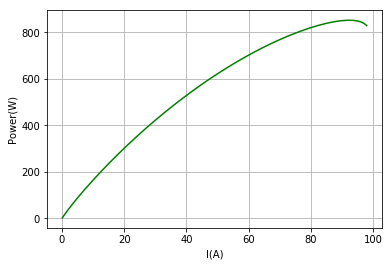

In [13]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

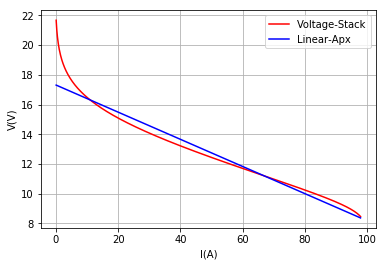

In [14]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

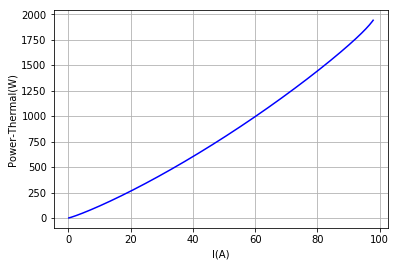

In [15]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

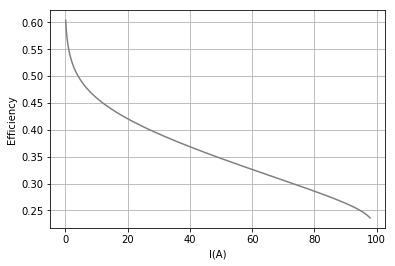

In [16]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

<a href="Larminie-Dicks/Larminiee_Test.html">HTML File</a>

<a href="Larminie-Dicks/Larminiee_Test.opem">OPEM File</a>

<a href="Larminie-Dicks/Larminiee_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">Fuel cell reversible no loss voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Cell operation temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$A$$</td>
        <td style="text-align:center;">The slope of the Tafel line</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_n$$</td>
        <td style="text-align:center;">Internal current</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_0$$</td>
        <td style="text-align:center;">Exchange current at which the overvoltage begins to move
from zero</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_L$$</td>
        <td style="text-align:center;">Limiting current</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R_m$$</td>
        <td style="text-align:center;">The membrane and contact resistances</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$N$$</td>
        <td style="text-align:center;">Number of single cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
         <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Constant in the mass transfer term </td>
        <td>$$V$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
                <tr>
    <td>$$n$$</td>
        <td style="text-align:center;">Number of moles of electrons transferred in the balanced equation occurring in the fuel cell</td>
        <td>$$--$$</td>
        <td>$$2$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

## Reference
<blockquote>
1-I. Sadli, P. Thounthong, J.-P. Martin, S. Rael, B. Davat. 2006.
"Behaviour of a PEMFC supplying a low voltage static converter."
Journal of Power Sources (Elsevier) 156: 119–125.
doi:10.1016/j.jpowsour.2005.08.021.
</blockquote>
<blockquote>
2-Larminie, J., Dicks, A., & McDonald, M. S. 2003. Fuel cell systems explained (Vol. 2, pp. 207-225). Chichester, UK: J. Wiley. doi: 10.1002/9781118706992.
</blockquote>